In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [127]:
df = pd.read_csv("C:/501.csv")

In [128]:
df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,17:06.0,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,17:06.0,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,17:06.0,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,17:06.0,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [129]:
df = df.sample(frac = 0.1)

In [130]:
data = df.iloc[:, 1:]
#data = df.drop('timestamp', axis=1)

In [131]:
data

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
55155,-1.409668,0.003662,-0.398682,-0.811523,0.115234,-0.523926,1
54150,-0.843994,0.062500,-0.222168,-0.977539,-0.180176,-0.088135,1
11651,-0.993652,-0.255127,-0.229004,-0.980957,0.268311,-0.447998,3
70950,-1.233643,0.065918,-0.540283,-1.244629,-0.311768,-0.378418,1
84696,-0.690430,-0.242432,-0.201660,-1.075928,-0.042236,0.306885,1
...,...,...,...,...,...,...,...
14287,-0.998047,-0.071289,-0.017334,-0.953125,0.013428,0.056396,6
28643,-0.953857,-0.015625,0.236084,0.031250,-0.062500,-1.093750,7
32431,-0.948242,-0.136475,-0.232178,-0.978027,-0.209473,-0.088867,1
38269,-0.903076,0.014648,-0.168701,-0.766846,-0.057861,-0.561279,1


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10386 entries, 55155 to 74001
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   back_x   10386 non-null  float64
 1   back_y   10386 non-null  float64
 2   back_z   10386 non-null  float64
 3   thigh_x  10386 non-null  float64
 4   thigh_y  10386 non-null  float64
 5   thigh_z  10386 non-null  float64
 6   label    10386 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 649.1 KB


In [133]:
data.isnull().sum()

back_x     0
back_y     0
back_z     0
thigh_x    0
thigh_y    0
thigh_z    0
label      0
dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['label']=le.fit_transform(data['label'])
data.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
55155,-1.409668,0.003662,-0.398682,-0.811523,0.115234,-0.523926,0
54150,-0.843994,0.062500,-0.222168,-0.977539,-0.180176,-0.088135,0
11651,-0.993652,-0.255127,-0.229004,-0.980957,0.268311,-0.447998,1
70950,-1.233643,0.065918,-0.540283,-1.244629,-0.311768,-0.378418,0
84696,-0.690430,-0.242432,-0.201660,-1.075928,-0.042236,0.306885,0


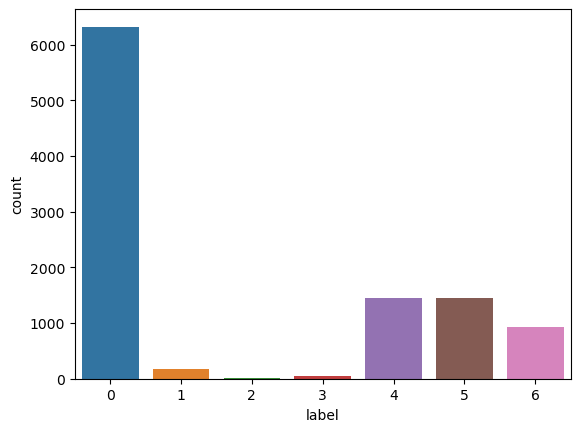

In [135]:
sns.countplot(data = data, x="label")

plt.show()

In [136]:
data['label'].value_counts()

0    6321
5    1454
4    1449
6     931
1     179
3      43
2       9
Name: label, dtype: int64

In [137]:
X = data.iloc[:, :-1]
y = data.iloc[:, [-1]]

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

C:\Users\82109\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
X

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
55155,-1.409668,0.003662,-0.398682,-0.811523,0.115234,-0.523926
54150,-0.843994,0.062500,-0.222168,-0.977539,-0.180176,-0.088135
11651,-0.993652,-0.255127,-0.229004,-0.980957,0.268311,-0.447998
70950,-1.233643,0.065918,-0.540283,-1.244629,-0.311768,-0.378418
84696,-0.690430,-0.242432,-0.201660,-1.075928,-0.042236,0.306885
...,...,...,...,...,...,...
14287,-0.998047,-0.071289,-0.017334,-0.953125,0.013428,0.056396
28643,-0.953857,-0.015625,0.236084,0.031250,-0.062500,-1.093750
32431,-0.948242,-0.136475,-0.232178,-0.978027,-0.209473,-0.088867
38269,-0.903076,0.014648,-0.168701,-0.766846,-0.057861,-0.561279


In [139]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [141]:
print("X_train.shape:", X_train.shape)

print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape: (8308, 6)
y_train.shape: (8308, 7)
X_test.shape: (2078, 6)
y_test.shape: (2078, 7)


In [142]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [143]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='ReLU', input_shape=(6,)))
    model.add(layers.Dense(32, activation='ReLU'))
    model.add(layers.Dense(16, activation='ReLU'))
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.04), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                448       
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 7)                 119       
                                                                 
Total params: 3,175
Trainable params: 3,175
Non-trainable params: 0
_________________________________________________________________


In [148]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1662 - accuracy: 0.9537 - val_loss: 0.1955 - val_accuracy: 0.9552
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1571 - accuracy: 0.9559 - val_loss: 0.1937 - val_accuracy: 0.9456
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1575 - accuracy: 0.9568 - val_loss: 0.1501 - val_accuracy: 0.9596
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1516 - accuracy: 0.9561 - val_loss: 0.1579 - val_accuracy: 0.9586
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.9568 - val_loss: 0.1607 - val_accuracy: 0.9552
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.9556 - val_loss: 0.1682 - val_accuracy: 0.9601
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 0.1599 - accuracy: 0.9545 - val_loss: 0.1587 - val_accuracy: 0.9572

Epoch 58/100
260/260 [==============================] - 1s 2ms/step - loss: 0.2126 - accuracy: 0.9531 - val_loss: 0.1776 - val_accuracy: 0.9562
Epoch 59/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1715 - accuracy: 0.9547 - val_loss: 0.1758 - val_accuracy: 0.9567
Epoch 60/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1649 - accuracy: 0.9570 - val_loss: 0.1753 - val_accuracy: 0.9557
Epoch 61/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1591 - accuracy: 0.9576 - val_loss: 0.1778 - val_accuracy: 0.9567
Epoch 62/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1612 - accuracy: 0.9567 - val_loss: 0.1835 - val_accuracy: 0.9572
Epoch 63/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1607 - accuracy: 0.9573 - val_loss: 0.1971 - val_accuracy: 0.9504
Epoch 64/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9580 - val_loss: 0.1667 - val_accuracy:

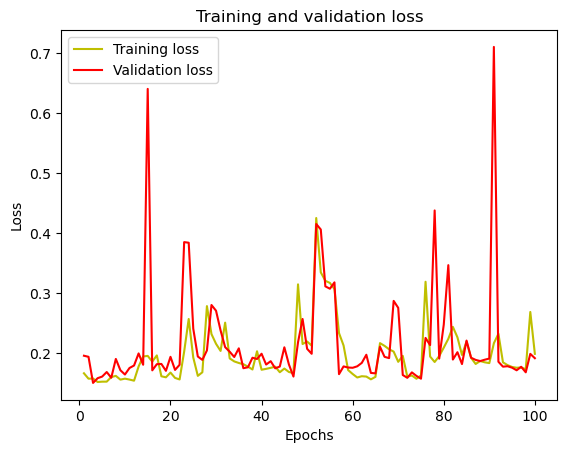

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

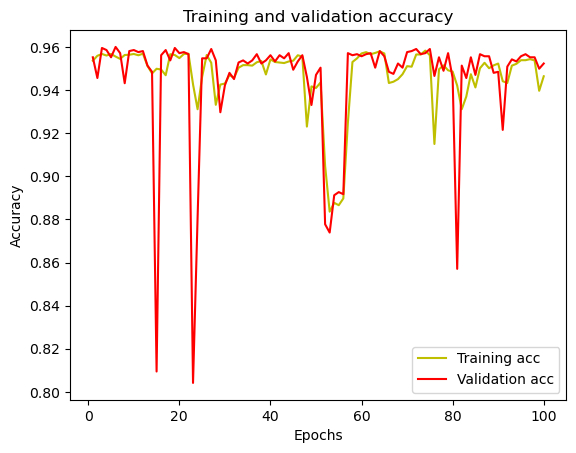

In [150]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [151]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1271
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.94      0.89      0.91       286
           5       0.98      1.00      0.99       302
           6       1.00      1.00      1.00       175

    accuracy                           0.95      2078
   macro avg       0.55      0.55      0.55      2078
weighted avg       0.93      0.95      0.94      2078

[[1248    0    0    0   16    7    0]
 [  33    0    0    0    1    0    0]
 [   5    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0]
 [  32    0    0    0  254    0    0]
 [   0    0    0    0    0  302    0]
 [   0    0    0    0    0    0  175]]


C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
